### figure out how to get the misregistration between two images  20250909 CJH

In [29]:
import cv2, numpy as np
import glob
import matplotlib.pyplot as plt

In [37]:
files = glob.glob('align\*.jpg')
files

['align\\cam1_arducam_align_image.jpg',
 'align\\cam1_arducam_align_image_1m.jpg',
 'align\\cam2_arducam_align_image.jpg',
 'align\\cam2_arducam_align_image_1m.jpg']

In [31]:
ref_img = cv2.imread(files[3], cv2.IMREAD_GRAYSCALE)  # cam2
mov_img = cv2.imread(files[1], cv2.IMREAD_GRAYSCALE)  # cam1

In [32]:
def estimate_shift(ref, mov):
    # returns (dx, dy) so that translating mov by (-dx,-dy) aligns to ref
    A = cv2.cvtColor(ref, cv2.COLOR_BGR2GRAY) if ref.ndim==3 else ref
    B = cv2.cvtColor(mov, cv2.COLOR_BGR2GRAY) if mov.ndim==3 else mov
    A, B = A.astype(np.float32), B.astype(np.float32)
    win = cv2.createHanningWindow((A.shape[1], A.shape[0]), cv2.CV_32F)
    (dx, dy), _ = cv2.phaseCorrelate(A*win, B*win)
    return dx, dy

In [33]:
# example usage:
dx, dy = estimate_shift(ref_img, mov_img)
M = np.float32([[1,0,-dx],[0,1,-dy]])                 # note the minus sign
aligned = cv2.warpAffine(mov_img, M, (ref_img.shape[1], ref_img.shape[0]))
aligned

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [36, 36, 36, ...,  0,  0,  0],
       [36, 36, 36, ...,  0,  0,  0],
       [36, 36, 36, ...,  0,  0,  0]], shape=(480, 640), dtype=uint8)

In [34]:
# this is what we need for shifting
dx, dy

(47.709425333593686, -49.73258110653336)

In [35]:
ref_img.shape

(480, 640)

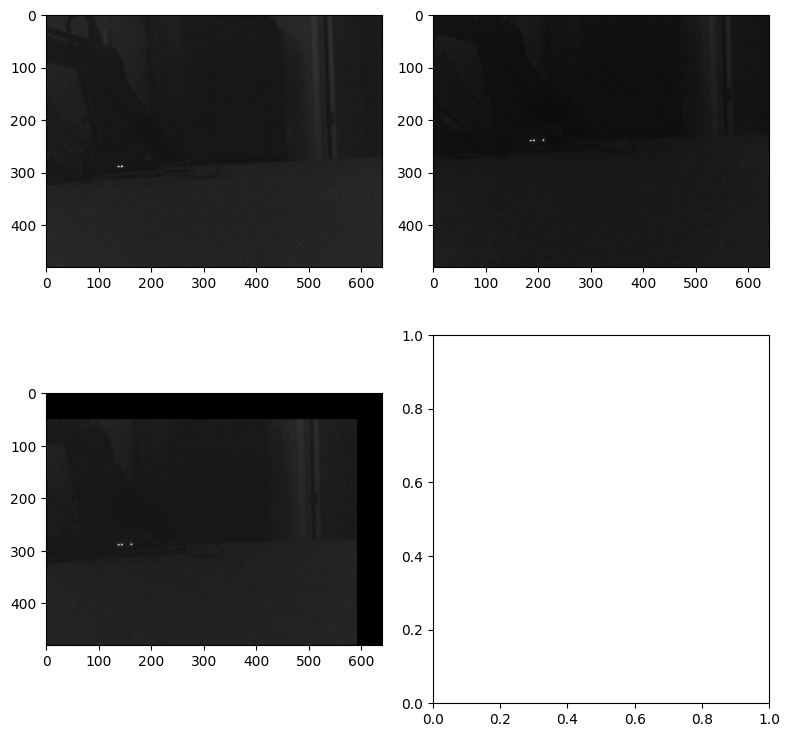

In [36]:
fig, axs = plt.subplots(2,2, figsize=(8,8))
ax = axs.flatten()
ax[0].imshow(ref_img, cmap='gray')
ax[1].imshow(mov_img, cmap='gray')
ax[2].imshow(aligned, cmap='gray')
fig.tight_layout()